In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bidi import algorithm as bidialg
import arabic_reshaper
plt.rcParams["font.family"] = "Roboto"
plt.style.use('ggplot')
%matplotlib inline

In [18]:
#2018 
df_2018_stem_clean = pd.read_excel("sorted_data/Master_STEM_clean.xlsx", sheet_name='2016')
# df_2017_stem_clean = pd.read_excel("sorted_data/Master_STEM_clean.xlsx", sheet_name='2017')
# df_2016_stem_clean = pd.read_excel("sorted_data/Master_STEM_clean.xlsx", sheet_name='2016')
display(df_2018_stem_clean.tail(10))
# display(df_2017_stem_clean.tail(10))
# display(df_2016_stem_clean.tail(10))

,الجنسية,الجنس,المنطقة التعليمية,حكومي/خاص,المدرسة,النسبة
15893,كويتي,بنات,التعليم الخاص,خاص,النجاة النموذجية الثانوية للبنات,97.74
15894,مصري,بنات,التعليم الخاص,خاص,النجاة النموذجية الثانوية للبنات,96.16
15895,مصري,بنات,التعليم الخاص,خاص,النجاة النموذجية الثانوية للبنات,87.33
15896,ايران,بنات,التعليم الخاص,خاص,الفحيحيل النموذجية الثانوية - بنات - المشتركة,90.28
15897,كويتي,بنات,التعليم الخاص,خاص,الفحيحيل النموذجية الثانوية - بنات - المشتركة,69.20
15898,كويتي,بنات,التعليم الخاص,خاص,الفحيحيل النموذجية الثانوية - بنات - المشتركة,92.82
15899,كويتي,بنات,التعليم الخاص,خاص,الفحيحيل النموذجية الثانوية - بنات - المشتركة,92.97
15900,كويتي,بنات,التعليم الخاص,خاص,الفحيحيل النموذجية الثانوية - بنات - المشتركة,84.37
15901,كويتي,بنات,التعليم الخاص,خاص,الفحيحيل النموذجية الثانوية - بنات - المشتركة,86.48
15902,كويتي,بنين,التربية الخاصة,مراكــز,مركز الرجاء الثانوي رجال,84.49


In [19]:
# Disection
df_2018_stem_local = df_2018_stem_clean.loc[df_2018_stem_clean[u'الجنسية'] == u'كويتي']
df_2018_stem_expat = df_2018_stem_clean.loc[df_2018_stem_clean[u'الجنسية'] != u'كويتي']

df_2018_stem_male = df_2018_stem_clean.loc[df_2018_stem_clean[u'الجنس'] == u'بنين']
df_2018_stem_female = df_2018_stem_clean.loc[df_2018_stem_clean[u'الجنس'] != u'بنين']

df_2018_stem_male_local = df_2018_stem_male.loc[df_2018_stem_male[u'الجنسية'] == u'كويتي']
df_2018_stem_male_expat = df_2018_stem_male.loc[df_2018_stem_male[u'الجنسية'] != u'كويتي']

df_2018_stem_female_local = df_2018_stem_female.loc[df_2018_stem_female[u'الجنسية'] == u'كويتي']
df_2018_stem_female_expat = df_2018_stem_female.loc[df_2018_stem_female[u'الجنسية'] != u'كويتي']

display(df_2018_stem_local.head(10))
display(df_2018_stem_expat.head(10))
display(df_2018_stem_male.head(10))
display(df_2018_stem_female.head(10))

,الجنسية,الجنس,المنطقة التعليمية,حكومي/خاص,المدرسة,النسبة
0,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,74.77
1,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,71.05
2,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,70.82
3,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,94.29
4,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,77.45
5,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,85.50
6,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,77.27
7,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,97.87
8,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,94.89
9,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,78.32


,الجنسية,الجنس,المنطقة التعليمية,حكومي/خاص,المدرسة,النسبة
55,سوري,بنين,العاصمة,حكــومى,عبدالله العتيبي الثانوية للبنين,82.10
78,بحريني,بنين,العاصمة,حكــومى,عبدالله العتيبي الثانوية للبنين,87.54
85,صومالي,بنين,العاصمة,حكــومى,عبدالله العتيبي الثانوية للبنين,83.33
133,مصري,بنين,العاصمة,حكــومى,عبدالله العتيبي الثانوية للبنين,98.79
158,يمني,بنين,العاصمة,حكــومى,عيسى أحمد الحمد الثانوية للبنين,91.25
162,سوري,بنين,العاصمة,حكــومى,عيسى أحمد الحمد الثانوية للبنين,91.26
165,يمني,بنين,العاصمة,حكــومى,عيسى أحمد الحمد الثانوية للبنين,83.51
171,مصري,بنين,العاصمة,حكــومى,عيسى أحمد الحمد الثانوية للبنين,88.32
217,سعودي,بنين,العاصمة,حكــومى,عيسى أحمد الحمد الثانوية للبنين,88.19
220,غير محدد الجنسية,بنين,العاصمة,حكــومى,عيسى أحمد الحمد الثانوية للبنين,94.10


,الجنسية,الجنس,المنطقة التعليمية,حكومي/خاص,المدرسة,النسبة
0,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,74.77
1,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,71.05
2,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,70.82
3,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,94.29
4,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,77.45
5,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,85.50
6,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,77.27
7,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,97.87
8,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,94.89
9,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,78.32


,الجنسية,الجنس,المنطقة التعليمية,حكومي/خاص,المدرسة,النسبة
740,كويتي,بنات,العاصمة,حكــومى,جمانه بنت ابى طالب الثانوية للبنات,95.86
741,كويتي,بنات,العاصمة,حكــومى,جمانه بنت ابى طالب الثانوية للبنات,96.40
742,كويتي,بنات,العاصمة,حكــومى,جمانه بنت ابى طالب الثانوية للبنات,86.76
743,كويتي,بنات,العاصمة,حكــومى,جمانه بنت ابى طالب الثانوية للبنات,81.14
744,كويتي,بنات,العاصمة,حكــومى,جمانه بنت ابى طالب الثانوية للبنات,84.31
745,كويتي,بنات,العاصمة,حكــومى,جمانه بنت ابى طالب الثانوية للبنات,97.24
746,سعودي,بنات,العاصمة,حكــومى,جمانه بنت ابى طالب الثانوية للبنات,86.79
747,كويتي,بنات,العاصمة,حكــومى,جمانه بنت ابى طالب الثانوية للبنات,86.17
748,كويتي,بنات,العاصمة,حكــومى,جمانه بنت ابى طالب الثانوية للبنات,92.02
749,غير محدد الجنسية,بنات,العاصمة,حكــومى,جمانه بنت ابى طالب الثانوية للبنات,77.90


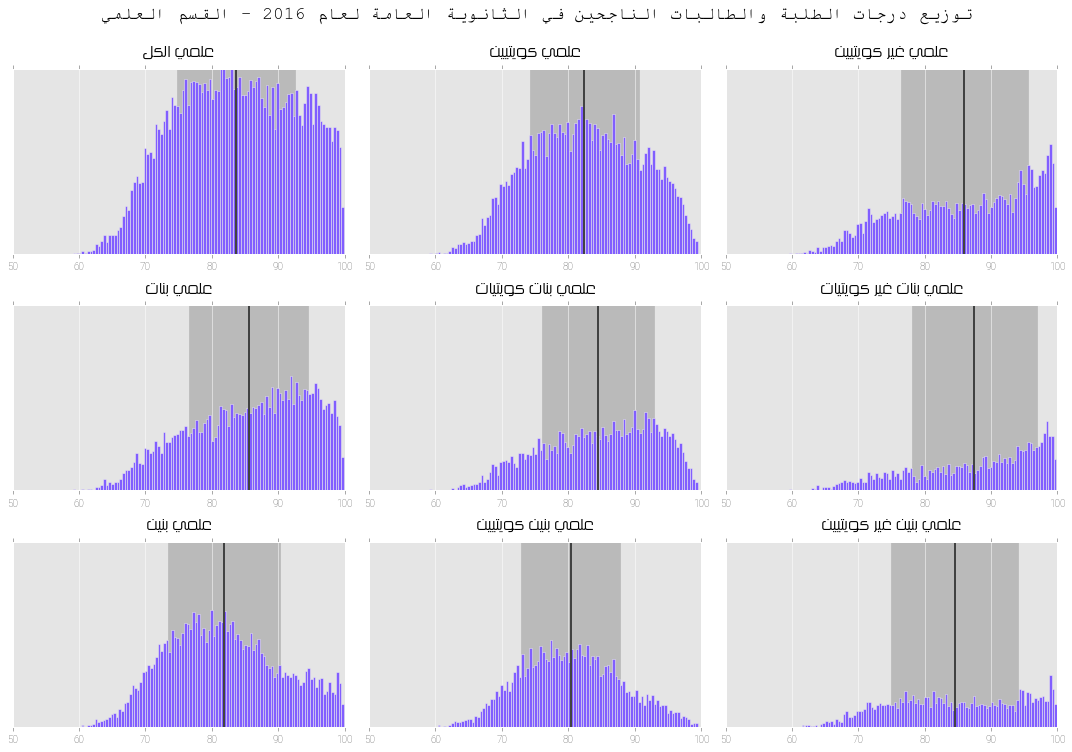

In [20]:
def arabic_text(utext):
    reshaped_text = arabic_reshaper.reshape(utext)
    return bidialg.get_display(reshaped_text)
ncols_ = 3
nrows_ = 3
fig, axes = plt.subplots(figsize=(15, 10), nrows=nrows_, ncols=ncols_)
axes = axes.flatten()

dissection_plot_list_2018 = [[df_2018_stem_clean, u'علمي الكل'], 
                            [df_2018_stem_local, u'علمي كويتيين'], 
                            [df_2018_stem_expat, u'علمي غير كويتيين'],
                            [df_2018_stem_female, u'علمي بنات'], 
                            [df_2018_stem_female_local, u'علمي بنات كويتيات'], 
                            [df_2018_stem_female_expat, u'علمي بنات غير كويتيات'],
                            [df_2018_stem_male,  u'علمي بنين'], 
                            [df_2018_stem_male_local, u'علمي بنين كويتيين'], 
                            [df_2018_stem_male_expat, u'علمي بنين غير كويتيين']]

for k, df_pair in enumerate(dissection_plot_list_2018):
    desc = df_pair[0][u'النسبة'].describe()
    df_pair[0][u'النسبة'].plot.hist(stacked=True , color='#815eff', bins=100, ax=axes[k]) #2016 Color: 815eff, 2017 color: 4286f4
    axes[k].set_title(arabic_text(df_pair[1]), fontname='KacstTitle', y=1.04)
    axes[k].axvline(x=desc['mean'], color='#414242', lw=2)
    axes[k].axvspan(desc['mean'] - desc['std'], desc['mean'] + desc['std'], alpha=0.5, color='#919191', zorder=0)
    axes[k].get_yaxis().set_visible(False)
    axes[k].set_xlim([50,100])
    axes[k].set_ylim([0,250])

fig.suptitle(arabic_text(u'توزيع درجات الطلبة والطالبات الناجحين في الثانوية العامة لعام 2016 - القسم العلمي'), fontname='Courier New',fontsize=18, y=1.04)
fig.tight_layout()

In [21]:
fig.savefig("Figures/2016histogram.svg", bbox_inches='tight')


In [169]:
df_2018_stem_clean[u'حكومي/خاص'].value_counts()

حكــومى    11020
خاص         3609
مراكــز      510
منــازل        7
Name: حكومي/خاص, dtype: int64

In [167]:
df_2017_stem_clean[u'حكومي/خاص'].value_counts()

حكــومى    9619
مراكــز    1776
خاص        1207
منــازل      57
Name: حكومي/خاص, dtype: int64

In [168]:
df_2016_stem_clean[u'حكومي/خاص'].value_counts()

حكــومى    10777
خاص         4602
مراكــز      502
منــازل       22
Name: حكومي/خاص, dtype: int64